In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.special import comb
from matplotlib import pyplot as plt

# 实践中的统计
MeadWestvaco 公司，是一家生产铜版纸和特种纸、消费品和办公用品以及特种化学制品的企业，是同行业中的领导者  
MeadWestvaco 内部的顾问组通过抽样为公司提供大量信息，以保证企业获得可观的产品收益，并在该行业保持竞争力  
管理人员需要掌握关于木材及森林准确而可靠的信息，如森林的现有储量如何，森林以往的生长情况如何，森林未来计划生长情况如何，等等  
从遍布森林的抽样点手机数据是对公司拥有的树木总体进行了解的基础。为了确定抽样点，首先按照位置和树种将木材林分成三部分，使用地图和随机数，MeadWestvaco的分析人员从每部分森林中选取1/7-1/5英亩的树木组成随机样本  
全体林务员参加数据的收集过程。这些抽样数据被录入公司的森林资源永续存货（CFI）计算机系统。该系统所提供的报告汇总了大量数据的频数分布信息，对包括树木类型、现有森林储量、森林以往生产率、未来计划森林生长情况和储量做出统计 5  
本章将学习简单随机抽样和样本选择方法。此外，还将介绍抽样分布的重要概念  
在第1章中，我们给出了个体、总体和样本的定义  
1. 个体是搜集数据的基本单位  
2. 总体是所有感兴趣的个体的集合  
3. 样本是总体的一个子集 5  

我们选择一个样本的目的就是为了收集进行推断的数据，并且回答关于总体的一个研究问题  
1. 得克萨斯州某个政治团体的成员正在考虑支持某候选人竞选美国参议员。选取得克萨斯州400名登记选民组成一个样本，其中有160人对该候选人表示支持。因此，登记选民总体中支持该候选人比率的估计值为0.4  
2. 一个论坛制造商正在设计开发一种新型轮胎，这种轮胎行驶的里程数超过了企业现有生产线上轮胎的里程数  
    制造商选取了120个这种新型轮胎组成样本用于检测，检测结果表明样本均值为36500英里。于是，该新型轮胎总体的平均使用寿命的估计值为36500英里  

抽样结果提供的仅仅是相应总体特征值的估计，认识到这一点非常重要。利用适当的抽样方法，抽样结果可以给出关于总体参数的一个“好”的估计。那么，我们希望抽样结果好到什么程度？统计过程对此问题可以做出回答 5  
我们定义一些抽样的术语。从中抽取样本的总体叫做**抽样总体**。**抽样框**是用于抽选样本的个体清单。第一个例子中，抽样总体是得克萨斯州所有的登记选民，抽样框是所有登记选民的清单  
在轮胎行驶里程的例子中，由于120个轮胎所组成的样本取自某一特定时点的生产过程，定义抽样总体变得尤为困难。我们可以把抽样总体看做一个由生产过程某一特定时点所生产的全部轮胎组成的抽象总体  
从这个意义上讲，可以认为抽样总体是无限的，因此无法构建一个抽样框  
本章首先阐明如何采用简单随机抽样从一个有限总体中选取样本，以及从一个持续运行过程形成的无限总体中，描述如何从中选取随机样本。然后，我们说明如何利用抽样得到的数据计算总体均值、总体标准差和总体比率的估计值  5  
# 7.1 EAI公司的抽样问题  
EAI公司的人事部经理被分派一项任务，为公司2500名管理人员制定一份简报，内容包括管理人员的平均年薪和公司中已完成公司管理培训计划的管理人员所占的比率  
2500名管理人员构成此项研究的总体，我们可以参考公司的职员记录找到总体中每个人的年薪金额和是否完成管理培训计划  
利用EAI的数据和第3章所介绍的公式，可以计算年薪数据的总体均值和总体标准差  

In [2]:
'''
pandas series s.mean()  
pandas series s.std()  
'''
eai = pd.read_csv('../pydata-book-master/statistics_for_business_economics/ch07/EAI.csv')
print(eai.columns)
eai_salary=eai['Annual Salary']
salary_mu=eai_salary.mean()
salary_sigma=eai_salary.std()
print('总体均值={:.0f}美元，总体标准差={:.0f}美元'.format(salary_mu,salary_sigma))

Index(['Manager', 'Annual Salary', 'Training Program'], dtype='object')
总体均值=51800美元，总体标准差=4000美元


In [3]:
'''
'''
done_training=eai['Training Program'].value_counts()[0]

print('2500名管理人员中有{:}人已经完成培训计划，完成培训计划的总体比率是{:.2f}'.format(done_training,done_training/2500))

2500名管理人员中有1500人已经完成培训计划，完成培训计划的总体比率是0.60


总体的数字特征称作**参数**。将总体中已完成培训计划的职员比率记作p，则p=1500/2500=0.6。总体年薪均值、标准差、完成培训计划的总体比率都是EAI管理人员总体的参数 5  
现在，假设我们无法从公司的数据库中获得EAI全体管理人员这些必要的信息。我们考虑的问题是，如果不用总体中全体2500名管理人员，而是用一个样本的话，企业人事部经理将如何获取对这些总体参数的估计呢？  
首先，我们从考虑如何取得一个30名管理人员的样本入手，探究利用样本研究EAI问题的可能性 5  
# 7.2 抽样  
本节我们描述如何选择一个样本。首先，我们描述从有限总体抽样，然后描述从无限总体抽样  
## 7.2.1 从有限总体抽样  
在从有限总体抽样时，统计学家建议采用概率抽样，因为基于概率抽样的样本可以对总体进行有效的统计推断。从容量为N的有限总体抽取容量为n的简单随机样本的定义如下：  
<hr />

**简单随机样本（有限总体）**  
从容量为N的有限总体中抽取一个容量为n的样本，如果容量为n的每一个可能的样本都以相同的概率被抽到，则称该样本为**简单随机样本**  
<hr />

从一个有限总体中抽取简单随机样本时，一种方法是每次是只选择一个个体，总体中的每一个个体都以相同的概率被抽到  
为了从EAI管理人员组成的有限总体中选择一个简单随机样本，我们首先为每名管理人员指派一个数字构建一个抽样框： 5  
在实施简单随机样本的选取过程中，在30名管理人员被选出之前，表中先前已经出现过的随机数可能重复出现  
由于该管理人员已经被选入样本了，我们并不想选取一名管理人员超过一次，所以任何以前使用过的随机数将被忽略。这种选择样本的方式叫做**无放回抽样**  
如果我们选择样本时，对已经出现过的随机数仍选入样本，某些管理人员可能在样本中被两次货更多次地包括进来，则我们进行的是**有放回抽样**  
抽样方法中，有放回抽样是一种取得简单随机样本的有效途径，然而，无放回抽样更为常用。当我们提到简单随机抽样时，我们总是假定抽样是无放回的  

In [4]:
'''
数据分析 常用代码 无放回抽样 5  
pandas series s.sample() random_state
pandas series s.sample() replace
pandas series s.values
'''
eai['Manager'].sample(n=30,replace=False,random_state=1).values

array([1407,  298, 1277, 2369,  439, 2010,  643,  656, 1194, 2411,  899,
        469,  608, 2500, 2263,  590,  108,  536, 1550, 1266, 1577,  768,
       2057,  704, 2298,  852, 1282,  680, 2364, 1495])

## 7.2.2 从无限总体抽样
有时候，我们想从总体中抽取样本，但是总体容量无限大或者总体中的个体是由一个正在运行的过程产生的，从而产生的个体数量是无限的。因此，无法得到总体中所有个体的清单。对于无限总体的情形，统计学家建议抽取一个所谓的随机样本  
<hr />

**随机样本（无限总体）**  
如果从一个无限总体中抽取一个容量为n的样本，使得下面的条件得到满足：  
1. 抽取的每个个体来自同一总体;  
2. 每个个体的抽取是独立的  

则称该样本是一个**随机样本** 5  
<hr />

当从无限总体中抽取一个随机样本时，必须小心并仔细判断。每一种情况可能需要不同的抽取程序  
在普通的质量控制应用中，生产过程中所生产的产品数量是无限的。我们的抽样总体是由正在运行的生产过程生产的全部产品组成，而不仅仅是由那些已经生产的产品组成  
在这样一个生产操作中选取一个随机样本时最关心的是条件1，即“抽取的每个个体来自同一个总体”，为了确保这一条件成立，必须在近似相同的时点选择产品  
在诸如这样的生产过程中，设计的生产流程应确保每盒麦片的装盒是相互独立的，从而满足条件2，即“每个个体的抽取是独立的”  
从无限总体抽取随机样本的另一个例子是，考虑由到达快餐店的顾客组成的总体。顾客光临快餐店是一个正在进行中的过程，因此不能得到总体中所有顾客的一个名单 5  
如果设计一种抽样方法，使得样本中的所有个体都是餐厅的顾客并且是独立选择的，那么可以得到一个随机样本。因此，如果调查员是从那些来餐馆消费的人中选取样本的话，那么条件1可以被满足。尤为困难的是，确保独立地选取顾客  
随机样本选择方法的第二个条件“每个个体的抽取是独立的”的用意是，防止出现选择偏差。当调查员可以任意自由地选取顾客进入样本时，就可能发生选择偏差。通过确保某一顾客的入选并不影响其他顾客的入选，可以避免这些选择偏差  
快餐店的巨头——麦当劳恰好在这种情况下实施了一次随机抽样。抽样方法以一些顾客是否持有优惠券为依据。因为来到麦当劳的顾客出示优惠券是随机的，并且与其他顾客是相互独立的，因此这种抽样方式确保对顾客的选择是独立的   
从无限总体抽样的情况总是与某段时间正在进行的不断运转的过程相联系。例如生产线上生产的零部件、实验室中反复进行的实验、银行发生的交易、技术支持中心接到的电话以及进入零售店的顾客  
## 注释
1. 本节中，我们详细定义了两类样本：来自一个有限总体的一个简单随机样本和来自一个无限总体的一个随机样本。在本书余下的部分中，我们一般这两类样本统称为随机样本或者样本 5  
2. 在从有限总体的抽样调查中，统计学家使用的抽样方法得到的是概率样本。在一个概率样本中，每个可能的样本都有一个已知的抽取概率，并且对样本中个体的抽取也试用了随机方法  
3. 从一个容量为N的有限总体，可以选取$$\frac{N!}{n1!(N-n)!}$$个样本容量为n的不同简单随机样本

In [5]:
'''
scipy Special functions (scipy.special) comb()
python str s.format() e
'''
n=30
print('由30名EAI管理人员组成的不同的简单随机样本的数目大约为{:.2e}个'.format(comb(2500,n)))

由30名EAI管理人员组成的不同的简单随机样本的数目大约为2.75e+69个


4. 计算机软件包可以用来抽取一个随机样本 5  

# 7.3 点估计
我们已经描述了如何选择一个简单随机样本的方法，现在让我们回到EAI问题。假定，已选取了一个由30名管理人员组成的简单随机样本，他们相应的年薪及参加管理培训的数据入表7-2所示  

In [6]:
'''
pandas dataframe d.sample()
pandas dataframe d.sample() random_state
'''
eai_sap=eai.sample(n,random_state=1).loc[:,['Annual Salary','Training Program']]
eai_sap.head()

,Annual Salary,Training Program
1406,58237.4,Yes
297,53036.3,Yes
1276,51922.8,No
2368,48539.7,No
438,54034.7,Yes


为了估计总体参数，计算相应的样本特征——**样本统计量**。例如，为了估计EAI管理人员年薪的总体均值$\mu$和总体标准差$\sigma$，我们用表7-2的数据计算相应的样本统计量：样本均值和样本标准差  

In [7]:
eai_sap_mu = eai_sap.mean()[0]
eai_sap_std = eai_sap.std()[0]
print('样本均值为{:.0f},标准差为{:.0f}'.format(eai_sap_mu,eai_sap_std))

样本均值为52040,标准差为3202


为了估计总体中完成管理培训计划的管理人员的比率p，我们使用其对应的样本比率$\bar{p}$。另x标识样本中完成管理培训计划的管理人员的人数 5  

In [8]:
''' 
pandas dataframe d.count()
'''
x = eai_sap[eai_sap['Training Program']=='Yes'].count()[0]
print('从而，样本比率为={:.2f}'.format(x/n))

从而，样本比率为=0.63


通过上述计算过程，我们完成了称为点估计的统计过程  
称样本均值$\bar{x}$为总体均值$\mu$的**点估计量**，称s为总体标准差$\sigma$的点估计量，称样本比率$\bar{p}$为总体比率p的点估计量。$\bar{x}、s和\bar{p}$的数值称为参数的**点估计值**  
从表7-3可见，点估计值与总体参数的真值在某种程度上是有差异的。这个差异是可以预期的，因为在进行点估计时用的是来自总体的样本而不是对整个总体的普查  

<center> 表7-3 30名管理人员组成的简单随机样本的点估计值小结 5</center>

|总体参数|参数值|点估计量|点估计值|
|:-|:-|:-|:-|
|$\mu$:年薪的总体均值|51800美元|$\bar{x}$:年薪的样本均值|52040美元|
|$\sigma$:年薪的总体标准差|4100美元|s:年薪的样本标准差|3202美元|
|p:已完成管理培训计划的总体比率|0.60|$\bar{p}$:已完成管理培训计划的样本比率|0.63|

## 应用中的建议
本书的其余部分大都是关于统计推断的内容。点估计是统计推断的一种形式。我们使用样本统计量对总体参数进行推断  
当根据样本对总体进行推断时，抽样总体和目标总体之间具有密切的对应是非常重要的。**目标总体**是指我们想要推断的总体，抽样总体是指实际抽取样本的总体。但是，在一些情形下，并不是容易得到具有密切对应的抽样总体和目标总体    
考虑一个游乐园的例子，游乐园抽取其旅客组成一个样本，了解诸如游客的年龄和游园时间这样一些特征。假定所有样本中的个体都选自某一天，而这一天仅对某一大型企业的员工开放。那么，抽样总体应该由该企业的雇员及他们的家庭成员构成 5  
如果我们想要推断的模板总体是在一个典型的夏季里有代表性公园的游客，那么我们面对的抽样总体与目标总体存在显著差异。在这种情形下，我们对所做的点估计的有效性产生质疑  
总之，当利用样本去推断总体时，我们应该确保所设计的研究中抽样总体与目标总体高度一致。良好的判断是合理统计应用的必要成分 5  
# 7.4 抽样分布简介
在上一节，我们说样本均值$\bar{x}$是总体均值$\mu$的点估计量，样本比率$\bar{p}$是总体比率p的点估计量。假定我们选取另一个由30名EAI管理人员组成的简单随机样本，得到点估计值  
注意，得到了不同的$\bar{x}$和$\bar{p}$的值  
现在，假定将选取30名管理人员组成一个简单随机样本的过程一而再、再而三地进行下去，每次都计算$\bar{x}$和$\bar{p}$的值  
表7-4包含了从500个这样的简单随机样本所得到的部分结构。表7-5给出的是500个$\bar{x}$值的频数及频数分布。图7-1是$\bar{x}$的数值的相对频率直方图  

In [9]:
'''
表7-4 5
pandas dataframe d.sample() random_state  
pandas series s.round()  
pandas dataframe d.mean()
python Sequence Types — list, tuple, range s.append()
python Built-in Functions range()
'''
random_seed=1
def eaiSampling(seed):
    eai_sap=eai.sample(n,random_state=seed).loc[:,['Annual Salary','Training Program']]
    x=eai_sap.mean().round(0)[0]
    p=eai_sap[eai_sap['Training Program']=='Yes'].count().div(n).round(2)[0]
    return x,p

x_list=list()
p_list=list()

for i in range(500):
    x,p=eaiSampling(i)
    p_list.append(p)
    x_list.append(x)
    
eai_sp_df = pd.DataFrame({'sampleMean':x_list,'ratio':p_list})
eai_sp_df.head()

,sampleMean,ratio
0,53052.0,0.67
1,52040.0,0.63
2,52385.0,0.57
3,51084.0,0.40
4,50968.0,0.57


In [10]:
'''
表7-5 
数据分析 常用代码 频数分布 数量型v1
pandas series s.max()
pandas series s.min()
numpy Mathematical functions np.power()
numpy Array creation routines np.arange() step
pandas series s.sort_index()
pandas series s.name
pandas series s.sum()
pandas dataframe d.round()
pandas dataframe d.to_string()
'''
def freGro(s,group_number,prc=0):
    '''
        s: 需要分组的数据，series
        group_number：需要的组数，int
        返回：面元分割完的明细，Categorical
    '''    
    group_width=np.around((s.max()-s.min())/group_number,prc)
    group_list=np.arange(start=np.around(s.min(),prc)-np.power(10,-prc),
                         stop=np.around(s.min(),prc)+group_width*group_number+1,
                         step=group_width)    
    return pd.cut(s,bins=group_list)
    
def printDataDis(se,group_number,prc=0):
    '''
        se: 需要分组的数据，series
        group_number：需要的组数，int
        输出：格式化的频数分布
    '''
    s = freGro(se,group_number,prc)
    st = s.value_counts().sort_index()
    st.name='value'
    d = pd.DataFrame(st)
    d['rate'] = st.div(st.sum()).mul(100)
    print(d.round(2).to_string())
    
    
sm_s=eai_sp_df['sampleMean']
print(sm_s.max())
print(sm_s.min())
printDataDis(sm_s,9,-2)

54140.0
48870.0
                    value  rate
(48800.0, 49400.0]      1   0.2
(49400.0, 50000.0]      5   1.0
(50000.0, 50600.0]     19   3.8
(50600.0, 51200.0]     74  14.8
(51200.0, 51800.0]    149  29.8
(51800.0, 52400.0]    153  30.6
(52400.0, 53000.0]     69  13.8
(53000.0, 53600.0]     24   4.8
(53600.0, 54200.0]      6   1.2


In [11]:
'''
表7-5 
数据分析 常用代码 频数分布 数量型v2
pandas General functions pd.cut() right
'''
aas=pd.cut(sm_s,right=False,
   bins=np.arange(start=48500,stop=54501,step=500))
def freDis(s_input):
    '''
        se: 需要计算频数分布的数据，series
        输出：dataframe 频数分布
    '''
    s_temp = s_input.value_counts().sort_index()
    s_temp.name='value'
    d_output = pd.DataFrame(s_temp)
    d_output['rate'] = s_temp.div(s_temp.sum())
    return d_output

eai_freDis=freDis(aas)
eai_freDis

,value,rate
"[48500, 49000)",1,0.002
"[49000, 49500)",0,0.000
"[49500, 50000)",5,0.010
"[50000, 50500)",15,0.030
"[50500, 51000)",42,0.084
"[51000, 51500)",105,0.210
"[51500, 52000)",133,0.266
"[52000, 52500)",122,0.244
"[52500, 53000)",47,0.094
"[53000, 53500)",21,0.042


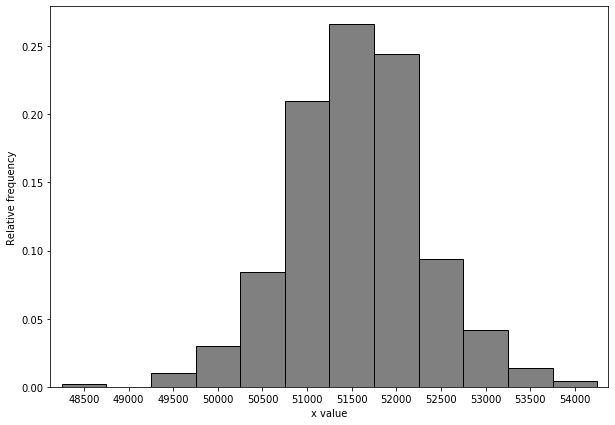

In [12]:
'''
图7-1 
matplotlib Pyplot function overview plt.bar() width
matplotlib Pyplot function overview plt.bar() edgecolor/color
matplotlib Pyplot function overview plt.xlabel()
'''
s_freDis=eai_freDis['rate']
s_freDis.index=np.arange(start=48500,stop=54500,step=500)

s_freDis.plot.bar(width=1,edgecolor='black',color='gray',figsize=(10,7))
plt.ylabel('Relative frequency')
plt.xlabel('x value')
plt.xticks(rotation=360)
plt.show()

在第5章中，我们将随机变量定义为对一个试验的结果的数值描述。如果我们将抽取一个简单随机样本的过程看做一个试验，则样本均值$\bar{x}$就是对试验结果的一个数值描述   
从而，样本均值$\bar{x}$是一个随机变量。因此，就像其他随机变量一样，$\bar{x}$有均值或数学期望、标准差和概率分布 5  
由于各种$\bar{x}$的可能值是不同简单随机样本的结果，$\bar{x}$的概率分布叫做$\bar{x}$的**抽样分布**  
让我们回到图7-1，我们需要列举出每一个可能的由30名管理人员组成的样本，并计算每个样本均值来完全确定$\bar{x}$的抽样分布  
从这个近似，我们发现分布形状是钟形的。我们还注意到，$\bar{x}$值大部分聚集在总体均值$\mu$附近，500个$\bar{x}$值得均值在总体均值$\mu=51800$美元附近  
样本比率$\bar{p}$得500个值得相对频率直方图汇总在图7-2中。与$\bar{x}$的情形一样，$\bar{p}$是一个随机变量  
如果从总体中将容量为30的每一个可能的样本都选出，并且计算每个样本的$\bar{p}$值，所得到的概率分布叫$\bar{p}$的抽样分布 5  
500个样本值的相对频率直方图见图7-2，它给出了$\bar{p}$  的抽样分布的一般外形特点  

In [13]:
ra=eai_sp_df['ratio']
print(ra.max())
print(ra.min())

0.83
0.37


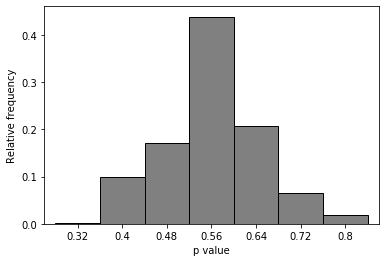

In [14]:
'''
图 7-2
'''
parray=np.arange(start=0.32,stop=0.88,step=0.08)
pcut=pd.cut(ra,right=False,bins=parray)
eai_freDis_p=freDis(pcut)
p_freDis=eai_freDis_p['rate']
p_freDis.index=np.around(np.arange(start=0.32,stop=0.87,step=0.08),2)
p_freDis.plot.bar(width=1,edgecolor='black',color='gray')
plt.ylabel('Relative frequency')
plt.xlabel('p value')
plt.xticks(rotation=360)
plt.show()

在实践中，我们只从总体中抽取一个简单随机样本  
在本节我们将抽样过程简单地重复进行了500次，仅仅是为了说明可能取得许多不同的样本，而不同的样本所得到的样本统计量$\bar{x}$和$\bar{p}$的值也是各种各样的 5  
# 7.5 $\bar{x}$的抽样分布  
在上一节中，我们说样本均值$\bar{x}$是一个随机变量，称它的概率分布为$\bar{x}$的抽样分布  
本节所描述的$\bar{x}$的抽样分布的性质，与我们所研究的其他概率分布一样，$\bar{x}$的抽样分布有均值或数学期望、标准差和形状或形态特征  
<hr />

**$\bar{x}$的抽样分布**  
$\bar{x}$的抽样分布式样本均值$\bar{x}$的所有可能值得概率分布  
<hr />

## 7.5.1 $\bar{x}$的数学期望  
在EAI抽样问题中，我们看到不同的简单随机样本得出不同的样本均值$\bar{x}$的值。随机变量$\bar{x}$的均值式$\bar{x}$的数学期望。令$E(\bar{x})$表示$\bar{x}$的数学期望，$\mu$表示我们抽取简单随机样本的总体的均值。对简单随机抽样，可以证明$E(\bar{x})$与$\bar{x}$相等 5  
<hr />

**$\bar{x}$的数学期望** (7-1)$$E(\bar{x})=\mu$$  
式中，$E(\bar{x})$代表$\bar{x}$的数学期望;$\mu$代表总体均值  
<hr />

该结果说明，对于简单随机抽样，$\bar{x}$的抽样分布的均值或数学期望等于总体均值  
当点估计量的期望值等于总体参数时，我们称这个点估计量是**无偏的**。于是，式（7-1）说明$\bar{x}$是总体均值$\mu$的无偏估计量  
## 7.5.2 $\bar{x}$的标准差  
采用以下记号，我们给出$\bar{x}$抽样分布的标准差的定义 5  
$\sigma_\bar{x}—\bar{x}$的标准差  
$\sigma$—总体标准差  
n—样本容量  
N—总体容量  
可以证明，$\bar{x}$的标准差的公式依赖于总体是否有限。下面给出$\bar{x}$的标准差的两个公式 5  
<hr />

**$\bar{x}$的标准差**(7-2)  
有限总体$$\sigma_\bar{x}=\sqrt{\frac{N-n}{N-1}}\left(\frac{\sigma}{\sqrt{n}}\right)$$
无限总体$$\sigma_\bar{x}=\frac{\sigma}{\sqrt{n}}$$
<hr />

比较式（7-2）中两个公式，我们看到有限总体需要系数$\sqrt{(N-n)/(N-1)}$，而无限总体则不需要该系数。通常称该系数为**有限总体修正系数**  
在许多实际抽样情况中，我们发现虽然总体是有限的，但容量很“大”，相对而言样本容量很“小”，这时有限总体修正系数$\sqrt{(N-n)/(N-1)}$趋近于1，可以忽略有限总体$\bar{x}$的标注差与无限总体$\bar{x}$的标准差之间的差别  
由此观察导致得出下面计算$\bar{x}$的标准差的一般指导方针或经验法则 5  
<hr />

**计算$\bar{x}$的标准差的公式**(7-3)$$\sigma_\bar{x}=\frac{\sigma}{\sqrt{n}}$$  
当1)总体是无限的；或2)总体是有限的，但样本容量小于等于总体容量的5%，即n/N≤0.05时  
<hr />

当n/N>0.05时，使用式（7-2）中有限总体的公式计算$\sigma_\bar{x}$。除非特别说明，本书中我们假定总体容量足够“大”，使得n/N≤0.05，可以用式(7-3)计算$\sigma_\bar{x}$  
为了计算$\sigma_\bar{x}$，我们必须知道总体标准差$\sigma$。为了更加强调$\sigma_\bar{x}$与$\sigma$的不同，我们称$\bar{x}$的标准差$\sigma_bar{x}$为均值的**标准误差**  
一般地，标准误差指的是点估计量的标准差。随后，我们将看到均值的标准误差有助于确定样本均值与总体均值的偏离程度 5  
在7.1节，我们看到2500名EAI管理人员年薪数据的总体标准差$\sigma=4000$美元。这时，总体是有限的，当样本容量为30时，有n/N=0.012  
因为样本容量小于总体容量的5%，所以可以忽略有限总体修正系数，采用式（7-3）计算$\bar{x}$的标准误差  

In [15]:
'''
数据分析 常用代码 样本均值的标准误差
'''
def stdError(sigma,n):
    return sigma/np.sqrt(n)

sigma_xbar=stdError(salary_sigma,n=n)

print('标准误差是{:.1f}'.format(sigma_xbar))

标准误差是730.3


## 7.5.3 $\bar{x}$的抽样分布的形态
前面关于$\bar{x}$的抽样分布的数学期望和标准差的结论适用于所有总体。确定$\bar{x}$抽样分布特征的最后一步是确定$\bar{x}$的概率分布形式或者形态。我们考虑两种情形：一种为总体服从正态分布，另一种为总体不服从正态分布  
**总体分布为正态分布** 在许多情况下，有理由假设，我们抽取简单随机样本的总体服从正态分布或近似服从正态分布。当总体服从正态分布时，在任何样本容量下，$\bar{x}$的抽样分布都是正态分布 5  
**总体分布为非正态分布** 当我们抽取简单随机样本的总体不服从正态分布时，中心极限定理有助于确定$\bar{x}$的抽样分布的形状  
总体分布未知时，**中心极限定理**能帮助我们确定$\bar{x}$抽样分布。中心定理在$\bar{x}$抽样分布中的应用如下所述  
<hr />

**中心极限定理**  
从总体中抽取容量为n的简单随机样本，当样本容量很大时，样本均值$\bar{x}$的抽样分布近似服从正态分布  
<hr />

图7-3说明中心极限定理对于三个不同总体的作用，每列对应于一个总体  
图7-3下面的三幅图给出了当样本容量分别为n=2,n=5和n=30时抽样分布的形状。最后，当样本容量为30时，我们看到是三个抽样分布的形态都近似于正态分布  5   
![7-3](../syn_pic/statistics_for_business_economics/7-3.png)
<center>图7-3 中心极限定理对三个总体的图示</center>

从应用者的角度看，样本容量应该达到多大时，我们才可以应用中心极限定理？才能够假定抽样分布的形态是近似正态的呢？统计研究人员通过分析各种总体不同样本容量下$\bar{x}$的抽样分布，并对该问题进行了研究  
在一般的统计实践中，对于大多数的应用，假定当样本容量大于或等于30时，$\bar{x}$的抽样分布可用正态分布近似。当总体是严重偏态或者出现异常点时，可能需要样本容量达到50  
最后，当总体为离散型时，正态近似中所需样本容量一般依赖于总体的比例   
## 7.5.4 EAI问题中$\bar{x}$的抽样分布  
让我们回到EAI问题中，先前给出了$E(\bar{x})=51800$美元，$\sigma_{\bar{x}}=730.3$ 5  
从这个角度上将，我们没有关于总体分布的任何信息，它可能服从正态分布，也可能不服从正态分布。在这两种情况下，我们都很容易地得到结论：$\bar{x}$的抽样分布可以用图7-4中的正态分布来描述    

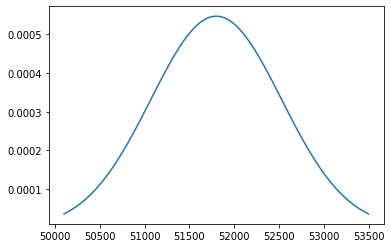

In [16]:
def normDis(mu,sigma):   
    '''
    数据分析 常用代码 正态分布图v1
    mu: 均值
    sigam: 标准差
    输出：正态分布图
    
    scipy Statistical functions (scipy.stats) norm() n.ppf()
    scipy Statistical functions (scipy.stats) norm() loc/scale 
    numpy Array creation routines np.linspace() num 
    scipy Statistical functions (scipy.stats) norm() n.pdf()
    matplotlib axes a.plot()
    '''
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(norm.ppf(0.01,loc=mu,scale=sigma),
                    norm.ppf(0.99,loc=mu,scale=sigma), 100)
    ax.plot(x, norm.pdf(x,loc=mu,scale=sigma))
    plt.show()
    
normDis(salary_mu,sigma_xbar)

## 7.5.5 $\bar{x}$的抽样分布的实际值
当抽取一个简单随机样本，用样本均值$\bar{x}$的值估计总体均值$\mu$时，我们不能期望样本均值恰好与总体均值相等。我们对$\bar{x}$的抽样分布感兴趣的实际原因是，它可以用来提供样本均值和总体均值之间差异的概率信息  
假定人事部经理认为当样本均值在总体均值左右500美元以内时，样本均值是总体均值的一个可接受的估计值  
以概率的术语来讲，人事部经理关心的是如下问题：我们根据30名EAI管理人员组成的简单随机样本得到的样本均值在总体均值左右500美元以内的概率多大？ 5  
我们已经定义了$\bar{x}$的抽样分布的性质（见图7-4），可以用该分布回答这一概率问题。再一次参看图7-5所示的$\bar{x}$的抽样分布。当总体均值为51800美元，人事部经理关心的是样本均值介于51300-52300美元的概率  
![7-5](../syn_pic/statistics_for_business_economics/7-5.png)
<center>图7-5 30名管理人员的简单随机样本的样本均值在总体均值左右500美元以内的概率</center>


In [17]:
def norm_diffcdf(start,end,loc=0,scale=1):
    '''
    数据分析 常用代码 正态分布区间概率
    start:start z
    end: end z
    return P
    '''
    return norm.cdf(end,loc,scale)-norm.cdf(start,loc,scale)

z=norm_diffcdf(start=salary_mu-500,end=salary_mu+500,
               loc=salary_mu,scale=sigma_xbar)
print('说明30名EAI管理人员的简单随机样本以{:.4f}的可靠性保证样本均值在总体均值左右500美元以内'.format(z))  

说明30名EAI管理人员的简单随机样本以0.5064的可靠性保证样本均值在总体均值左右500美元以内


换言之，由30名EAI管理人员组成的简单随机样本大约有50:50的机会使样本均值在所允许的500美元范围以内，也许应该考虑增加样本容量。我们通过考虑样本容量与抽样分布的关系来研究这一可能性 5  
## 7.5.6 样本容量与$\bar{x}$的抽样分布
假定在EAI抽样问题中，我们最初考虑的不是30名EAI管理人员而是100名EAI管理人员  
首先我们注意到，$E(\bar{x})=\mu$与样本容量n无关。于是，$\bar{x}$所有可能值的均值等于总体均值，与样本容量n无关。然而，均值的标准误差$\sigma_{\bar{x}}=\sigma/\sqrt{n}$与样本容量的平方根有关    

In [18]:
'''
数据分析 常用代码 样本均值的标准误差
'''
sigam_xbar_100=stdError(salary_sigma,100)
print('当样本容量增加到n=100时，均值的标准误差减少到{:.0f}'.format(sigam_xbar_100))

当样本容量增加到n=100时，均值的标准误差减少到400


N=30和n=100时$\bar{x}$的抽样分布见图7-6
![7-6](../syn_pic/statistics_for_business_economics/7-6.png)
<center>图7-6 n=30和n=100时EAI管理人员的简单随机样本的$\bar{x}$的抽样比较 5</center>

我们可以利用n=100时$\bar{x}$的抽样分布，计算100名EAI管理人员组成的简单随机样本的样本均值在总体均值左右500美元以内的概率  

In [19]:
z=norm_diffcdf(start=salary_mu-500,end=salary_mu+500,
               loc=salary_mu,scale=sigam_xbar_100)
print('说明100名EAI管理人员的简单随机样本以{:.4f}的可靠性保证样本均值在总体均值左右500美元以内'.format(z))  

说明100名EAI管理人员的简单随机样本以0.7887的可靠性保证样本均值在总体均值左右500美元以内


在这一讨论中，重点是当样本容量增加时，均值的标准误差减少。结论是，随着样本容量的增加，样本均值落在总体均值某一特定范围内的概率也随之增大  
## 注释
1. 在EAI问题中得到$\bar{x}$的抽样分布时，我们基于总体均值$\mu=51800$和总体标准差$\sigma=400$是已知的事实。然而，用于确定$\bar{x}$的抽样分布所需要的总体均值$\mu$  和总体标准差$\sigma$的值通常是未知的  
2. 中心极限定理的理论证明中要求样本中的观察值是独立的。对无限总体和从有限总体的有放回抽样中得到的样本都满足该条件  
    虽然中心极限定理没有直接要求从有限总体中的抽样是有放回的，但是一般统计应用中只有当总体容量较大的情形下，才使用中心极限定理 5  
    
# 7.6 $\bar{p}$的抽样分布  
样本比率是总体比率p的点估计量。计算样本比率的公式为$$\bar{p}=\frac{x}{n}$$  
式中，x代表样本中具有被关注的个体的个数;n代表样本容量  
正如7.4节中所述，样本比率$\bar{p}$是一个随机变量，称它的概率分布为样本比率$\bar{p}$的抽样分布  
<hr />

**$\bar{p}$的抽样分布** 5  
$\bar{p}$的抽样分布是样本比率$\bar{p}$的所有可能值的概率分布
<hr />

为了确定样本比率$\bar{p}$与总体比率p的接近程度，我们需要了解$\bar{p}$的抽样分布的性质：$\bar{p}$的数学期望、$\bar{p}$的标准差以及$\bar{p}$的抽样分布的形状或形态  
## 7.6.1 $\bar{p}$的数学期望  
$\bar{p}$的数学期望是$\bar{p}$的所有可能值的均值，它与总体比率p相等  
<hr />

**$\bar{p}$的数学期望**(7-4)$$E(\bar{p})=p$$
式中，$E(\bar{p})$代表$\bar{p}$的数学期望;p代表总体比率
<hr />

由于$E(\bar{p})=p$，所以$\bar{p}$是p的无偏估计量 5  
## 7.6.2 $\bar{p}$的标准差  
同样本均值$\bar{x}$的标准差一样，我们发现$\bar{p}$的标准差以总体是有限的还是无限的为依据。下面给出计算$\bar{p}$的标准差的两个公式  
<hr />

**$\bar{p}$的标准差**（7-5）  
有限总体$$\sigma_{\bar{p}}=\sqrt{\frac{N-n}{N-1}}\sqrt{\frac{p(1-p)}{n}}$$  
无限总体$$\sigma_{\bar{p}}=\sqrt{\frac{p(1-p)}{n}}$$  
<hr />

比较式（7-5）中两个式子，我们看到不同之处仅仅在于是否使用有限总体修正系数$\sqrt{(N-n)/(N-1)}$  
与样本均值$\bar{x}$的情形一样，若有限总体的总体容量相对于样本容量足够大，有限总体与无限总体在表达式上的不同可以忽略不计 5  
我们遵循与样本均值$\bar{x}$的标准差相同的经验法则，即，如果总体是有限的，且当n/N≤0.05时，我们使用公式$\sigma_{\bar{p}}=\sqrt{\frac{p(1-p)}{n}}$；然而，如果总体是有限的并且n/N>0.05时，则需要采用有限总体修正系数  
在7.5节中，我们称$\bar{x}$的标准差为均值的标准误差。同样的，对于比率我们称$\bar{p}$的标准差为比率的标准误差  
在EAI研究中，我们已知管理人员中参加管理培训计划的总体比率p=0.6。由于n/N=30/2500=0.012，从而在计算$\bar{p}$的标准误差时可以忽略有限总体修正系数  

In [20]:
def stdErrorP(p,n):
    '''
    数据分析 常用代码 样本比率的标准误差
    p：总体比率
    n：样本容量
    输出：样本比率的标准误差
    '''
    return np.sqrt(p*(1-p)/n)

sampleP=stdErrorP(p=0.6,n=30)
print('对由30名管理人员组成的简单随机样本，样本比率p的标准误差为{:.4f}'.format(sampleP))

对由30名管理人员组成的简单随机样本，样本比率p的标准误差为0.0894


## 7.6.3 $\bar{p}$的抽样分布的形态  
现在，我们已经知道了$\bar{p}$的抽样分布的均值和标准差，最后一步是确定抽样分布的形状或形态。样本比率为$\bar{p}=x/n$ 5  
对于一个来自容量很大的总体的简单随机样本而言，样本中具有被关注特征个体的数目x是一个服从二项分布的随机变量  
由于n是一个常数，因此x/n与x服从相同的二项概率分布，这就意味着：$\bar{p}$的抽样分布也是一个离散型的概率分布，并且$\bar{p}=x/n$每个取值的概率与x的概率相同  
在第6章中，我们还证明了当样本容量足够大，并且满足下面两个条件时：$$np\ge5和n(1-p)\ge5$$  
一个二项分布可以用正态分布来近似。这一近似关系表述如下: 5  
<hr />

当$np\ge5和n(1-p)\ge5$时，$\bar{p}$的抽样分布可以用正态分布近似  
<hr />

在实际应用中，当对总体比率进行估计时，我们发现样本容量几乎总是足够大，从而允许对$\bar{p}$的抽样分布进行正态近似  
回忆EAI抽样问题中，我们已经知道：参加培训计划的管理人员的总体比率p=0.6。对于一个样本容量为30的简单随机样本，np=18,n(1-p)=12。因此，$\bar{p}$的抽样分布可以用一个正态分布近似，如图7-8所示  
![7-8](../syn_pic/statistics_for_business_economics/7-8.png)
<center>图7-8 EAI管理人员中参加管理培训计划的比率$\bar{p}$的抽样分布</center>

## 7.6.4 $\bar{p}$的抽样分布的实际值
$\bar{p}$的抽样分布实际值可以对样本比率与总体比率的差异程度提供概率信息 5  
假如，假定在EAI问题中人事部经理想要知道：得到的$\bar{p}$值在管理人员参加培训计划的总体比率p±0.05以内的概率是多少？图7-9中阴影部分区域的面积即为所求概率  
![7-9](../syn_pic/statistics_for_business_economics/7-9.png)
<center>图7-9 $\bar{p}$值介于z=0.55到z=0.65之间的概率</center>


In [21]:
p=0.6
sampleP_5prop=norm_diffcdf(p-0.05,p+0.05,p,sampleP)
print('于是，抽取一个样本，该样本比率在总体比率±0.05以内的概率是{:.4f}'.format(sampleP_5prop))

于是，抽取一个样本，该样本比率在总体比率±0.05以内的概率是0.4238


如果我们考虑将样本容量增加到n=100，则样本比率的标准误差为  

In [22]:
'''
5
'''
samplePv2=stdErrorP(p=0.6,n=100)
print('对由100名管理人员组成的简单随机样本，样本比率p的标准误差为{:.4f}'.format(samplePv2))

对由100名管理人员组成的简单随机样本，样本比率p的标准误差为0.0490


In [23]:
'''
5
'''
p=0.6
sampleP_propv2=norm_diffcdf(p-0.05,p+0.05,p,samplePv2)
print('于是，如果样本容量从30增加到100，那么该样本比率在总体比率±0.05以内的概率将增加到{:.4f}'.format(sampleP_propv2))

于是，如果样本容量从30增加到100，那么该样本比率在总体比率±0.05以内的概率将增加到0.6926


# 7.7 点估计的性质  
本章我们已经说明了样本统计量，如样本均值$\bar{x}$、样本标准差s、样本比率$\bar{p}$如何用作相应总体参数$\mu、\sigma$和p的点估计量。直观上，用这些样本统计量作为相应总体参数的点估计量是很具有吸引力的  
然而，在一个样本统计量成为点估计量之前，统计学家需要对样本统计量是否具有某些与好的点估计量相联系的性质进行检验。本节我们讨论一个好的点估计量应该具有的三条性质：无偏性、有效性和一致性  
由于有许多不同的样本统计量可以用作总体不同参数的点估计量，因此本节我们采用以下的一般记号  
$\theta$——所感兴趣的总体参数  
$\hat{\theta}$——样本统计量或$\theta$的点估计量 5  
符号$\theta$是希腊字母，读作theta；符号$\hat{\theta}$读作theta尖。通常，$\theta$代表某一总体参数，比如总体均值、总体标准差和总体比率，等等；$\hat{\theta}$代表相应的样本统计量，比如样本均值、样本标准差和样本比率  
## 7.7.1 无偏性  
如果样本统计量的期望值等于所顾忌的总体参数的值，则称该样本统计量是相应总体参数的无偏统计量  
<hr />

**无偏性**  
样本统计量$\hat{\theta}$是总体参数$\theta$的无偏估计量，如果$$E(\hat{\theta})=\theta$$  
式中$E(\hat{\theta})$代表样本统计量$\hat{\theta}$的数学期望  
<hr />

于是，一个无偏的样本统计量的所有可能值的期望值或均值等于被估计的总体参数 5  
图7-10说明了有偏和无偏点估计量的情形。在无偏估计量的例子中，抽样分布均值与总体参数的值相等。在图7-10b中，由于$E(\hat{\theta})$比$\theta$大，从而样本统计量以较大的概率高估总体参数值。偏斜程度如图7-10所示  
![7-10](../syn_pic/statistics_for_business_economics/7-10.png)
<center>图7-10 有偏与无偏点估计量的例子</center>

在讨论样本均值和样本比率的抽样分布时，我们证明了$E(\bar{x})=\mu$和$E(\bar{x})=p$。因此$\bar{x}$和$\bar{p}$都是相应总体参数$\mu$和$p$的无偏估计量  
对于样本标准差s和样本方差$s^2$，可以证明$E(s^2)=\sigma^2$，因此样本方差$s^2$是总体方差$\sigma^2$的无偏估计量  
## 7.7.2 有效性  
假定由n个个体组成的一个简单随机样本给出了总体同一参数的两个不同的无偏点估计量。称有较小标准误差的点估计量比其他点估计量**相对有效** 5  
图7-11给出了两个无偏点估计量$\hat{\theta}_1$和$\hat{\theta}_2$的抽样分布。注意，由于$\hat{\theta}_1$的标准误差比$\hat{\theta}_2$的标准误差小，因此$\hat{\theta}_1$的值比$\hat{\theta}_2$的值接近参数$\theta$的机会更大  
![7-11](../syn_pic/statistics_for_business_economics/7-11.png)
<center>图7-11 两个无偏点估计量的抽样分布</center>

## 7.7.3 一致性  
与一个好的点估计量相联系的第三个性质是**一致性**。粗略地讲，如果随着样本容量的增大，点估计量的值与总体参数越来越接近，则称该点估计量是一致的  
注意，对样本均值$\bar{x}$，我们可以证明$\bar{x}$的标准误差为$\sigma_{\bar{x}}=\sigma/\sqrt{n}$  
由于$\sigma_{\bar{x}}$与样本容量有关，样本容量越大，$\sigma_{\bar{x}}$的值越小，我们的结论是：大样本容量下所给出的点估计与总体均值$\mu$更接近 5  
从这个意义上，我们可以说样本均值$\bar{x}$是总体均值$\mu$的一个一致估计量。同理，我们也可以得出结论，样本比率$\bar{p}$是总体比率p的一个一致估计量  
## 注释  
在第3章，我们证明了均值和中位数是度量位置中心的两种方法。而在本章，我们只对均值进行讨论  
这是因为，正态分布的总体均值与总体中位数是相等的，当从正态总体中抽样时，中位数的标准误差大约比均值的标准误差大将近25%。因此，样本均值更有效，以更高的概率落入总体均值附近的某一特定范围内 5  
# 7.8 其他抽样方法  
作为从有限总体进行抽样的一种方法，我们已经描述了简单随机抽样并且讨论了简单随机抽样下$\bar{x}和\bar{p}$的抽样分布的性质。此外还有分层随机抽样、整群抽样和系统抽样等方法  
## 7.8.1 分层随机抽样  
在**分层随机抽样**中，总体中的个体首先被分层称做层的组，总体中的每一个个体属于其仅属于某一层  
由抽样设计者按部门、位置、年龄、产业类型等进行层的划分。当每一层内的个体都尽可能地相似时，得到的结果最佳。图7-12是将一个总体分层H层的图示  
![7-12](../syn_pic/statistics_for_business_economics/7-12.png)
<center>图7-12 分层随机抽样的图示</center>

分层以后，从每一层抽一个简单随机样本。利用公式将每层的样本结果合并起来，用于估计感兴趣的总体参数 5  
如果层内的个体是同志的，则该层有较低的方差，于是，相对小的样本容量可以用来获得层特征的一个好的估计。如果各层是同质的，那么分层随机抽样方法能在较小的样本容量下得到与简单随机抽样同样精确的结果  
## 7.8.2 整群抽样  
在**整群抽样**中，总体中的个体首先被分成称做群的不同的组，总体中的每一个个体属于且仅属于某一群（见图7-13）  
![7-13](../syn_pic/statistics_for_business_economics/7-13.png)
<center>图7-13 整群随机抽样的图示</center>

以群为单位抽取一个简单随机样本，每一个被抽取的群内的所有个体组成一个样本。当群中的个体不同质时，整群抽样得到的结果最佳    
整群抽样的值依赖于每一群对整个总体的代表性。如果所有的群在这个意义上是同质的，则抽取小量的群就可以得到关于总体参数的好的估计 5  
整群抽样的基本应用之一是区域抽样，其中群为街区或以其他方式定义的区域。整群抽样通常比简单随机抽样或分层随机抽样所需样本容量要大  
## 7.8.3 系统抽样  
在某些抽样情况下，特别是对那些容量很大的总体，如果采取先认定一个随机数，然后通过计数或者搜索总体清单，直到找到相应的个体的方法来抽取一个简单随机样本，这是非常费时的。简单随机抽样的一个替代方式为**系统抽样**  
例如，如果希望从5000个个体的总体中选取容量为50的样本，因为5000/50=100，所以我们将从总体每100个个体中抽取一个个体作为样本点  
在这种情形下，系统抽样即为在总体清单的前100个个体中随机选取一个个体，然后从第一个已选出的个体开始，依次向下，在总体清单中每隔100个个体选取一个为样本点  
## 7.8.4 方便抽样  
迄今为止，讨论的抽样方式都被称为概率抽样技术。在根据样本结果对总体进行推断时会产生误差，我们利用抽样分布能对这里误差做出概率解释 5  
**方便抽样**是一种非概率抽样技术。顾名思义，样本的确定主要是基于简便。样本中所包括的个体不是事先确定的，也不是按照已知概率选取的  
方便抽样具有相对易于样本选择和收集数据的优点。一个方便样本可能得到好的结论，也可能不能。没有统计上公认的方法可用于对样本结果的质量进行分析和推断  
## 7.8.5 判断抽样  
另一种非概率抽样技术为**判断抽样**，在这种抽样方法中，由对研究的问题最熟悉的人选择总体中的哥忒，而这个人认为这些个体最具有总体的代表性。然而，抽样结果的质量依赖于选择样本的人的判断  
## 注释
当从有限总体抽样时，我们推荐采用概率抽样方法：简单随机抽样、分层随机抽样、整群抽样或系统抽样。对方便抽样或者判断抽样而言，它们都不能估计抽样结果的优质性 5  
# 小结
本章我们给出了抽样和抽样分布的概念。我们证明了如何从有限总体抽取一个简单随机样本和如何从无限总体抽取一个随机样本  
利用收集的样本数据可以对总体参数进行点估计。由于不同的样本给出了不同的点估计量的值，因此点估计量，比如$\bar{x}和\bar{p}$，都是随机变量。这样一个随机变量的概率分布叫做抽样分布  
在考虑$\bar{x}和\bar{p}$的抽样分布的特征时，我们证明了$E(\bar{x})=\mu和E(\bar{p})=p$。在给出这些估计量的标准差或标准误差的公式后，我们给出了$\bar{x}和\bar{p}$的抽样分布服从正态部分的必要条件 5  
# 关键术语
**抽样总体** 抽取样本的总体  
**抽样框** 抽取样本时所用的个体清单  
**参数** 总体的数值特征，如总体均值$\mu$、总体标准差$\sigma$、总体比率p，等等  
**简单随机样本** 从容量为N的有限总体中抽取一个容量为n的样本，使得容量为n的每一个可能的样本都以相同的概率被抽到  
**随机样本** 从一个无限总体中抽取一个随机样本，使得下面的条件得到满足：1.抽取的每个个体来自同一总体；2.每个个体的抽取是独立的 5  
**无放回抽样** 一个个体一旦被选入样本，就从总体中剔除，不能再次被选入样本  
**有放回抽样** 一个个体被选入样本后扔放回总体中。先前被抽到的个体可能再次被选入样本，从而在样本中可多次出现  
**样本统计量** 一种样本特征，如样本均值$\bar{x}$、样本标准差s、样本比率$\bar{p}$，等等。样本统计量的值用于估计相应总体参数的值  
**点估计量** 提供总体参数点估计的样本统计量，如$\bar{x}、s或\bar{p}$  
**点估计值** 点估计量的值，在一个特定实例中用来作为总体参数的一个估计值 5  
**目标总体** 进行统计推断（比如：点估计） 的总体。重要的是，目标总体应该与相应的抽样总体尽可能多的相似  
**抽样分布** 一个样本统计量所有可能值构成的概率分布  
**无偏性** 点估计量的一个性质，此时点估计量的数学期望等于所故总体参数的值  
**有限总体修正系数** 当从有限总体而非无线总体抽样时，$\sigma_{\bar{x}}和\sigma_{\bar{p}}$的公式中项$\sqrt{(N-n)/(N-1)}$。当n/N≤0。05时，根据经验法则一般可以忽略有限总体修正系数  
**标准误差** 点估计量的标准差 5  
**中心极限定理** 当样本容量很大的时候，使得我们可以用正态概率分布近似$\bar{x}$的抽样分布的定理  
**相对有效** 对同一总体参数的两个无偏点估计量，有较小标准误差的点估计量更有效  
**一致性** 点估计量的一个性质，随着样本容量的增大，点估计值与总体参数越来越接近  
**分层随机抽样** 一种概率抽样方式，总体先分成层，然后从每层中抽取简单随机样本  
**整群抽样** 一种概率抽样方式，总体先分成群，然后以群为单位进行简单随机抽样 5  
**系统抽样** 一种概率抽样方式，从前k个个体中随机抽取一个，然后往后每隔k个个体选取一个个体进入样本  
**方便抽样** 一种非概率抽样方式，在方便的基础上选择样本中的个体  
**判断抽样** 一种非概率抽样方式，以人们在进行研究时的判断为依据，选择样本中的个体 5  
# 重要公式
